In [1]:
#pip install seaborn
#!pip install statsmodels

In this notebook, I'll be covering linear and logistic regression models applied to the Iris data set. This data set contains 150 observations of three species of iris plants:

-Setosa
<br>
-Versicolor
<br>
-Virginica

The data contains four quantitative features for each observation. These are:

-Sepal Length
<br>
-Sepal Width
<br>
-Petal Length
<br>
-Petal Width

Along with the species identifaction for each sample.

The linear regression model attempts to predict the sepal length of a given sample based on the other three features. The logistic regression model attempts to classify each sample into one of the three species categories. For both model types, I used two approaches in Python.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import Iris Data Set and Apply Transformations

In [4]:
# Import Dataset from sklearn
from sklearn.datasets import load_iris
# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

# Function to convert species label to string name
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'
    
target_df['species'] = target_df['species'].apply(converter)

# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


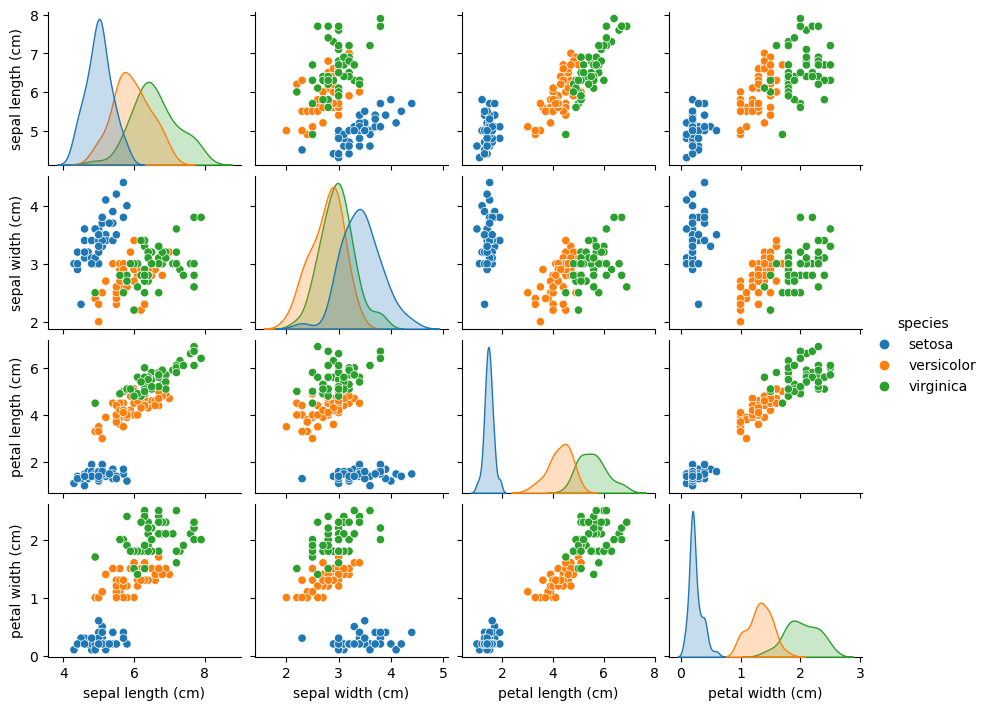

In [8]:
g = sns.pairplot(iris_df, hue= 'species')
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[species]'>]],
      dtype=object)

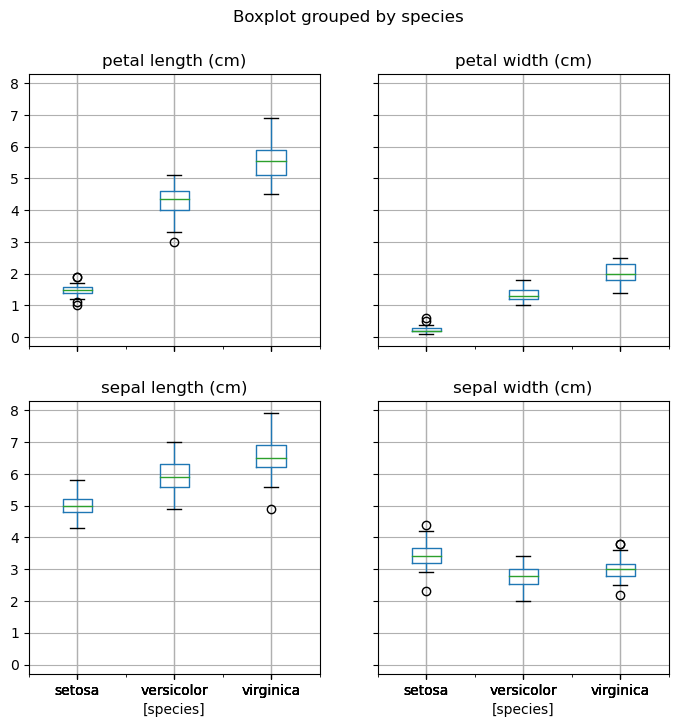

In [9]:
iris_df.boxplot(by="species", figsize=(8,8))

## Scikit-learn Model to Predict Sepal Length of Flowers

In [10]:
# Convert object columns in iris and target df back to numerical dtype
iris_df.drop('species', axis = 1, inplace = True)
target_df = pd.DataFrame(columns = ['species'], data = iris.target)
iris_df = pd.concat([iris_df, target_df], axis = 1)

# Variables
X = iris_df.drop(labels= 'sepal length (cm)', axis = 1)
y = iris_df['sepal length (cm)']

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')
print()
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Absolute Percentage Error:', (mean_absolute_error(y_test, pred))*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
print(f'R-squared: {r2_score(y_test, pred)}')

Coefficients: [ 0.64459239  0.78368144 -0.57972748 -0.16428262]
Intercept: 1.7726493046271683

Mean Absolute Error: 0.2595570975563037
Mean Absolute Percentage Error: 25.95570975563037
Mean Squared Error: 0.10174529564238961
Root Mean Squared Error: 0.3189753840696639
R-squared: 0.8468143505194407


### Testing out the model

In [11]:
iris_df.loc[33]

sepal length (cm)    5.5
sepal width (cm)     4.2
petal length (cm)    1.4
petal width (cm)     0.2
species              0.0
Name: 33, dtype: float64

In [12]:
d = {'sepal length (cm)' : [5.5],
    'sepal width (cm)' : [4.2],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.2],
    'species' : 0}
test_df = pd.DataFrame(data = d)
test_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.5,4.2,1.4,0.2,0


In [13]:
pred = lr.predict(X_test)
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', test_df['sepal length (cm)'])

Predicted Sepal Length (cm): 5.461145872156032
Actual Sepal Length (cm): 0    5.5
Name: sepal length (cm), dtype: float64


## Using statsmodels package

In [14]:
import statsmodels.api as sm

In [15]:
# Add constant to predictor variables
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.params

const                1.851198
sepal width (cm)     0.625279
petal length (cm)    0.742924
petal width (cm)    -0.404479
species             -0.226356
dtype: float64

In [16]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     226.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           2.51e-61
Time:                        14:07:12   Log-Likelihood:                -35.397
No. Observations:                 150   AIC:                             80.79
Df Residuals:                     145   BIC:                             95.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8512      0.248      7.451      0.000       1.360       2.342
sepal width (cm)      0.6253      0.067      9.288      0.000       0.492       0.758
petal length (cm)     0.7429      0.059     12.630      0.000       0.627       0.859
petal width (cm)     -0.4045      0.149     -2.721      0.007      -0.698      -0.111
species              -0.2264      0.117     -1.941      0.054      -0.457       0.004
==============================================================================
Omnibus:                        0.427   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.580
Skew:                          -0.069   Prob(JB):                        0.748
Kurtosis:                       2.729   Cond. No.                         56.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression

In [17]:
# Re-structure dataframe to include species name instead of integer representation

iris = load_iris()
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

target_df['species'] = target_df['species'].apply(converter)

# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [18]:
X=iris_df.iloc[:,0:4]
y=iris_df["species"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state = 101)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
log.fit(X_train,y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.98


In [21]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.98        22
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
cm

array([[15,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 13]])

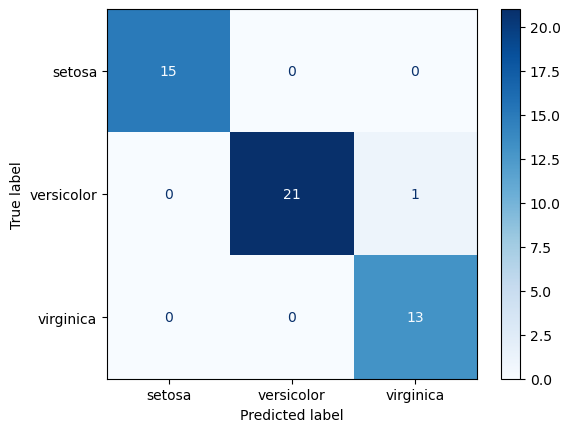

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [32]:
print(log.coef_)

[[-0.39435679  0.8282488  -2.18668396 -0.88536759]
 [ 0.47666225 -0.30284383 -0.08564219 -0.89500155]
 [-0.08230545 -0.52540497  2.27232615  1.78036913]]


## Statsmodels Logistic Regression

In [60]:
setosa = iris_df[iris_df['species'] == 'setosa']
        
virginica = iris_df[iris_df['species'] == 'virginica']
new_df = pd.concat([setosa, virginica])

new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
X=new_df.iloc[:,0:1]
y=new_df["species"]

In [67]:
logit_model=sm.Logit(y,sm.add_constant(X))
logit_model
result=logit_model.fit(method = 'bfgs')
stats1=result.summary()

print(stats1)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                float64
sepal length (cm)    float64
dtype: object. The data was
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 100, dtype: object
and
      const  sepal length (cm)
0      1.0                5.1
1      1.0                4.9
2      1.0                4.7
3      1.0                4.6
4      1.0                5.0
..     ...                ...
145    1.0                6.7
146    1.0                6.3
147    1.0                6.5
148    1.0                6.2
149    1.0                5.9

[100 rows x 2 columns]
before. After,
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica']
[[1.  5.1]
 [1.  4.9]
 [1.  4.7]
 [1.  4.6]
 [1.  5. ]
 [1.  5.4]
 [1.  4.6]
 [1.  5. ]
 [1.  4.4]
 [1.  4.9]
 [1.  5.4]
 [1.  4.8]
 [1.  4.8]
 [1.  4.3]
 [1.  5.8]
 [1.  5.7]
 [1.  5.4]
 [1.  5.1]
 [1.  5.7]
 [1.  5.1]
 [1.  5.4]
 [1.  5.1]
 [1.  4.6]
 [1.  5.1]
 [1.  4.8]
 [1.  5. ]
 [1.  5. ]
 [1.  5.2]
 [1.  5.2]
 [1.  4.7]
 [1.  4.8]
 [1.  5.4]
 [1.  5.2]
 [1.  5.5]
 [1.  4.9]
 [1.  5. ]
 [1.  5.5]
 [1.  4.9]
 [1.  4.4]
 [1.  5.1]
 [1.  5. ]
 [1.  4.5]
 [1.  4.4]
 [1.  5. ]
 [1.  5.1]
 [1.  4.8]
 [1.  5.1]
 [1.  4.6]
 [1.  5.3]
 [1.  5. ]
 [1.  6.3]
 [1.  5.8]
 [1.  7.1]
 [1.  6.3]
 [1.  6.5]
 [1.  7.6]
 [1.  4.9]
 [1.  7.3]
 [1.  6.7]
 [1.  7.2]
 [1.  6.5]
 [1.  6.4]
 [1.  6.8]
 [1.  5.7]
 [1.  5.8]
 [1.  6.4]
 [1.  6.5]
 [1.  7.7]
 [1.  7.7]
 [1.  6. ]
 [1.  6.9]
 [1.  5.6]
 [1.  7.7]
 [1.  6.3]
 [1.  6.7]
 [1.  7.2]
 [1.  6.2]
 [1.  6.1]
 [1.  6.4]
 [1.  7.2]
 [1.  7.4]
 [1.  7.9]
 [1.  6.4]
 [1.  6.3]
 [1.  6.1]
 [1.  7.7]
 [1.  6.3]
 [1.  6.4]
 [1.  6. ]
 [1.  6.9]
 [1.  6.7]
 [1.  6.9]
 [1.  5.8]
 [1.  6.8]
 [1.  6.7]
 [1.  6.7]
 [1.  6.3]
 [1.  6.5]
 [1.  6.2]
 [1.  5.9]].

The default optimizer for the discrete models ifails when the Hessian becomes singular. Other optimizers that don't use the information from the Hessian are able to finish the optimization. For example using 'bfgs'.

The predicted probabilities for Setosa are essentially (1, 0, 0), that is they are perfectly predicted

However, because of perfect separation the parameters are not identified, the values are determined mostly by the stopping criterion of the optimizer and the standard errors are very large.

When there is a convergence failure, then try different optimizers and different starting values (start_params). If some optimizers succeed, then it might be a difficult optimization problem, either with the curvature of the objective function, badly scaled explanatory variables or similar. A useful check is to use the parameter estimates of robust optimizers like nm or powell as starting values for the optimizers that are more strict, like newton or bfgs.

If the results are still not good after convergence of some optimizers, then it might be an inherent problem with the data like perfect separation in Logit, Probit and several other models or a singular or near singular design matrix. In that case the model has to be changed. Recommendation for perfect separation can be found with a internet search.

Source: https://stackoverflow.com/a/31511894/15975987